# SVM

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EDA

In [3]:
df.drop(["month","day"],axis=1,inplace=True)

In [4]:
df.shape

(517, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [6]:
df.duplicated().sum()

8

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

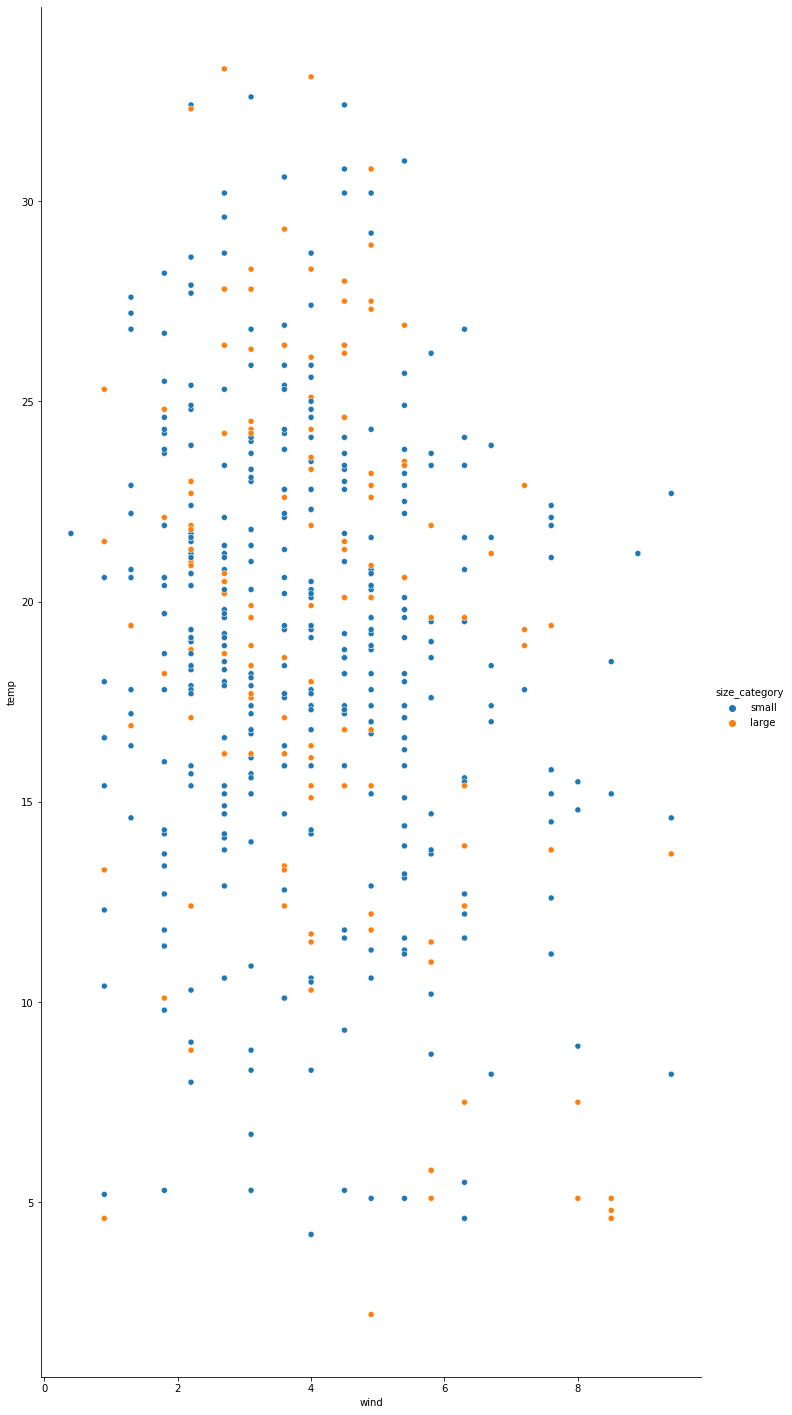

In [10]:
sns.pairplot(data=df,x_vars="wind",y_vars="temp",hue="size_category",height=20,aspect=0.5);

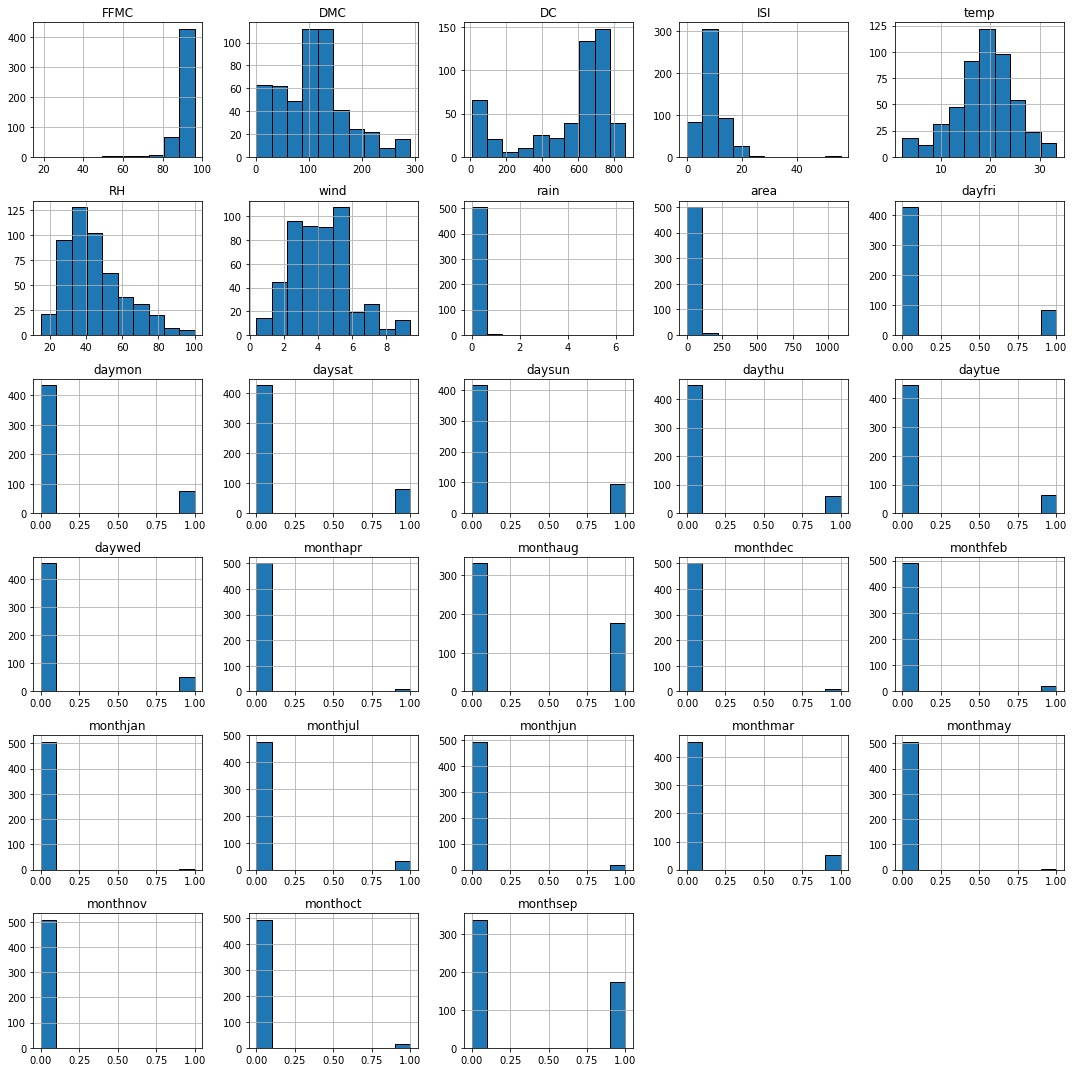

In [11]:
df.hist(edgecolor="k",figsize=(15,15))
plt.tight_layout();

## Separating Independent and Target Variable

In [12]:
x=df.drop("size_category",axis=1)
y=df["size_category"]


## Train Test split

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Scaling


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled_df=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled_df=pd.DataFrame(x_test_scaled,columns=x_test.columns)

## HyperParameter Tuning

In [15]:
# create a parameter grid for SVC 

param_grid={"C":[0.1,1,10,100,1000],
           "gamma": [1,0.1,0.01,0.001,0.0001],
           "kernel" : ["rbf","linear"]}

# instatiate the SVC model and GridSearchCV object and run the Grid search 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
svc=SVC()
grid_search=GridSearchCV(svc,param_grid,cv=kfold,verbose=2,n_jobs=-1,scoring="accuracy")
grid_search.fit(x_train_scaled_df,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [16]:
grid_search.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [17]:
best_svc=grid_search.best_estimator_
best_svc

SVC(C=10, gamma=1, kernel='linear')

In [18]:
pred_train1=best_svc.predict(x_train_scaled_df)
pred_test1=best_svc.predict(x_test_scaled_df)

In [19]:
from sklearn.metrics import classification_report

print("________TRAINING_DATA__________\n\n")
print(classification_report(y_train,pred_train1))
print("________TESTING_DATA__________\n\n")
print(classification_report(y_test,pred_test1))

________TRAINING_DATA__________


              precision    recall  f1-score   support

       large       0.99      0.96      0.97        94
       small       0.98      1.00      0.99       262

    accuracy                           0.99       356
   macro avg       0.99      0.98      0.98       356
weighted avg       0.99      0.99      0.99       356

________TESTING_DATA__________


              precision    recall  f1-score   support

       large       0.97      0.86      0.92        44
       small       0.95      0.99      0.97       109

    accuracy                           0.95       153
   macro avg       0.96      0.93      0.94       153
weighted avg       0.96      0.95      0.95       153



## SVM Model Building

In [20]:
from sklearn.svm import SVC

svc2=SVC(C=10,gamma=1,kernel="linear")
svc2.fit(x_train_scaled_df,y_train)

SVC(C=10, gamma=1, kernel='linear')

In [21]:
pred_train2=svc2.predict(x_train_scaled_df)
pred_test2=svc2.predict(x_test_scaled_df)

In [22]:
from sklearn.metrics import classification_report

print("________TRAINING_DATA__________\n\n")
print(classification_report(y_train,pred_train2))

print("________TESTING_DATA__________\n\n")
print(classification_report(y_test,pred_test2))

________TRAINING_DATA__________


              precision    recall  f1-score   support

       large       0.99      0.96      0.97        94
       small       0.98      1.00      0.99       262

    accuracy                           0.99       356
   macro avg       0.99      0.98      0.98       356
weighted avg       0.99      0.99      0.99       356

________TESTING_DATA__________


              precision    recall  f1-score   support

       large       0.97      0.86      0.92        44
       small       0.95      0.99      0.97       109

    accuracy                           0.95       153
   macro avg       0.96      0.93      0.94       153
weighted avg       0.96      0.95      0.95       153

